In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# TENEMOS DOS DATASET, UNO CON LA POTABILIDAD Y OTRO CON LA CALIDAD.
# EL DE POTABILIDAD TIENE 3276 FILAS Y 10 COLUMNAS Y EL DE CALIDAD 7999 FILAS Y 21 COLUMNAS.
# EN PRINCIPIO COGERE EL DE CALIDAD PORQUE TIENE MAS REGISTROS. NUESTRO TARGET SERA SI EL AGUA ES SEGURA O NO (COLUMNA IS_SAFE)
# ADEMAS, NO TIENE NINGUN REGISTRO NULO, LO QUE FACILITA LA TAREA.
# TAMPOCO TENEMOS VARIABLES CATEGORICAS, ES DECIR, QUE NO TENGO QUE USAR EL ENCODER (BIEN POR MI)

In [3]:
calidad = pd.read_csv('data/WaterQuality1.csv')
calidad

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
calidad.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [5]:
calidad.info()
# el target es objeto, habría que cambiarlo a numerico.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [6]:
calidad.isnull().sum() # parece que en principio no hay nulos

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [7]:
# HACEMOS EL PEQUEÑO EDA INICIAL
calidad.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [8]:
calidad.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [9]:
correlacion = calidad.corr(numeric_only=True)
correlacion
# no vemos una correlacion muy clara con el target de ninguna de las columnas

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
aluminium,1.000000,0.225773,0.294145,-0.099911,0.369309,0.353218,0.168612,-0.009784,-0.078238,-0.070863,0.020792,-0.003810,0.237307,-0.003306,0.363069,0.243217,-0.003672,0.334993,0.014711
arsenic,0.225773,1.000000,0.362945,0.334682,0.356559,0.312475,-0.036444,0.003792,0.035688,0.011703,-0.087756,0.027554,0.305005,-0.015404,0.332279,0.218204,-0.007009,0.307837,0.001455
barium,0.294145,0.362945,1.000000,-0.037803,0.446928,0.415972,0.065426,-0.018548,0.101259,-0.002276,-0.042888,-0.011331,0.312711,0.005987,0.462234,0.286569,0.035242,0.431606,-0.002440
cadmium,-0.099911,0.334682,-0.037803,1.000000,-0.144370,-0.157766,-0.109024,0.004880,-0.092431,0.021183,-0.034959,0.020194,-0.015682,-0.016174,-0.149344,-0.099259,0.010145,-0.155408,-0.005633
chloramine,0.369309,0.356559,0.446928,-0.144370,1.000000,0.555938,0.119059,0.004400,0.154510,0.003687,-0.030479,-0.001551,0.379685,-0.021472,0.588769,0.388806,0.011399,0.522447,-0.007658
chromium,0.353218,0.312475,0.415972,-0.157766,0.555938,1.000000,0.113043,-0.002284,0.142041,0.002430,-0.050501,-0.012793,0.335708,-0.022787,0.524532,0.315271,0.030539,0.510768,-0.005526
copper,0.168612,-0.036444,0.065426,-0.109024,0.119059,0.113043,1.000000,0.011683,0.149110,0.006292,0.121765,0.002332,0.162093,0.017626,0.104564,0.026215,-0.003267,0.089333,0.006978
flouride,-0.009784,0.003792,-0.018548,0.004880,0.004400,-0.002284,0.011683,1.000000,0.014134,0.018418,0.011905,-0.008140,-0.016669,-0.004400,-0.016191,0.007688,0.022629,0.014554,0.016792
bacteria,-0.078238,0.035688,0.101259,-0.092431,0.154510,0.142041,0.149110,0.014134,1.000000,0.618480,-0.027525,-0.033920,0.246252,-0.004471,0.147652,0.099298,-0.006971,0.148225,0.044839
viruses,-0.070863,0.011703,-0.002276,0.021183,0.003687,0.002430,0.006292,0.018418,0.618480,1.000000,0.017598,-0.044544,-0.091517,0.011416,0.003208,-0.020112,-0.035047,0.011861,0.058434


C:\Users\Picar\AppData\Local\Temp\ipykernel_33316\2221335371.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(calidad.corr(), annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)


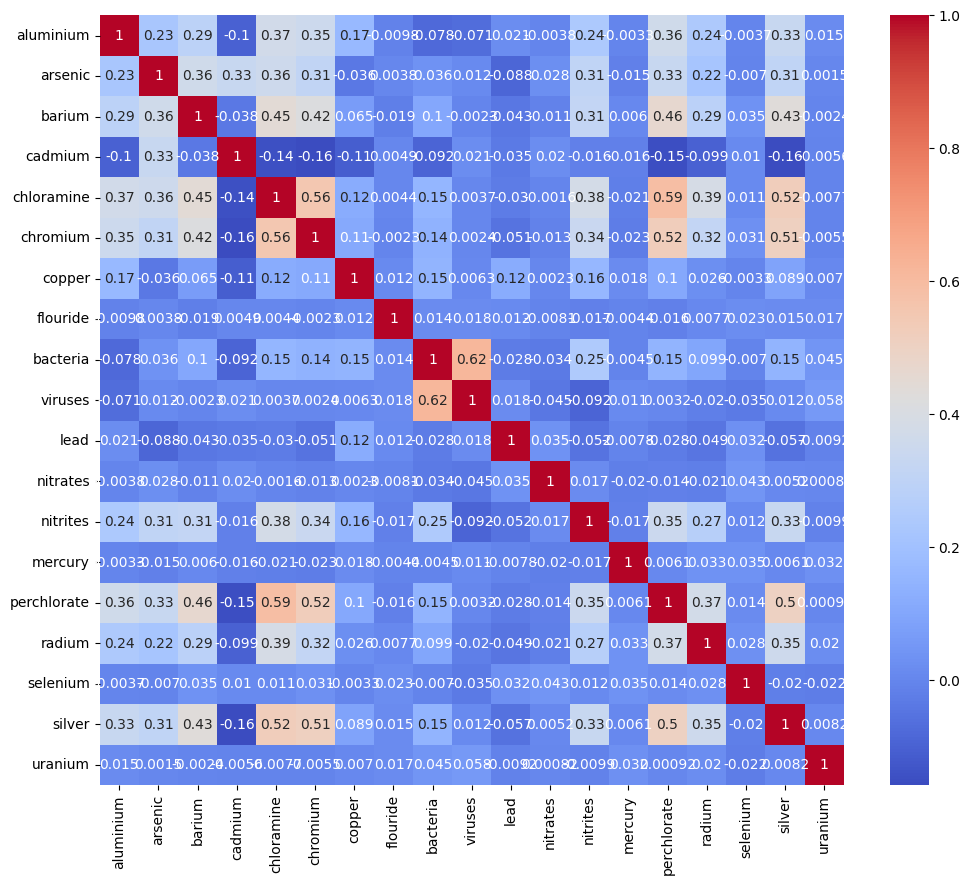

In [10]:
# podemos hacer un heatmap para visualizarlo mejor
plt.figure(figsize=(12, 10))
sns.heatmap(calidad.corr(), annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.show()

# aunque la correlacion no es enorme, SI QUE PODEMOS VER CIERTOS DATOS RELACIONADOS, COMO LOS VIRUSES Y LAS BACTERIAS
#COMO AL CLORAMINA Y EL PERCLORATO O EL PERCLORATO Y EL CROMO

In [11]:
# Vamos a visualizar el porcentaje del target, si el agua es segura o no (RECORDEMOS, 0 ES AGUA NO SEGURA, 1 SEGURA)
calidad['is_safe'].value_counts(normalize=True) # Para ver la division
# ¡¡el target esta totalmente desbalanceado HACIA EL CERO, QUE ES QUE EL AGUA ES NO SEGURA!!, 
# y hay datos mal etiquetados, #NUM!

0        0.885611
1        0.114014
#NUM!    0.000375
Name: is_safe, dtype: float64

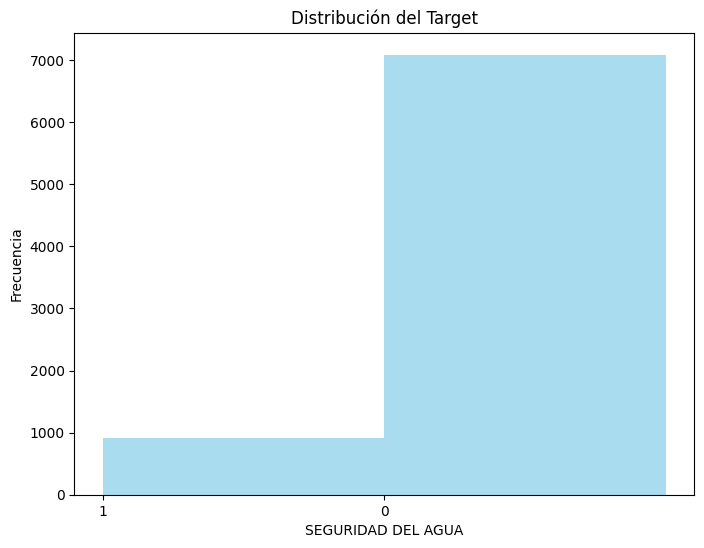

In [12]:
# representamos con un histograma para ver la distribucion
plt.figure(figsize=(8, 6))
plt.hist(calidad['is_safe'], bins=2, color='skyblue', alpha=0.7)
plt.xlabel('SEGURIDAD DEL AGUA')
plt.ylabel('Frecuencia')
plt.title('Distribución del Target')
plt.xticks([0, 1])
plt.show()

In [13]:
# primero, eliminamos los #NUM!
calidad['is_safe'] = pd.to_numeric(calidad['is_safe'], errors='coerce') # LOS CAMBIAMOS A NAN PARA ELIMINARLOS
calidad1 = calidad.dropna(subset=['is_safe'])


In [14]:
correlacion2 = calidad.corr(numeric_only=True)
correlacion2 # ahora que tenemos el target en numerico

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.225773,0.294145,-0.099911,0.369309,0.353218,0.168612,-0.009784,-0.078238,-0.070863,0.020792,-0.003810,0.237307,-0.003306,0.363069,0.243217,-0.003672,0.334993,0.014711,0.333974
arsenic,0.225773,1.000000,0.362945,0.334682,0.356559,0.312475,-0.036444,0.003792,0.035688,0.011703,-0.087756,0.027554,0.305005,-0.015404,0.332279,0.218204,-0.007009,0.307837,0.001455,-0.123362
barium,0.294145,0.362945,1.000000,-0.037803,0.446928,0.415972,0.065426,-0.018548,0.101259,-0.002276,-0.042888,-0.011331,0.312711,0.005987,0.462234,0.286569,0.035242,0.431606,-0.002440,0.090858
cadmium,-0.099911,0.334682,-0.037803,1.000000,-0.144370,-0.157766,-0.109024,0.004880,-0.092431,0.021183,-0.034959,0.020194,-0.015682,-0.016174,-0.149344,-0.099259,0.010145,-0.155408,-0.005633,-0.256034
chloramine,0.369309,0.356559,0.446928,-0.144370,1.000000,0.555938,0.119059,0.004400,0.154510,0.003687,-0.030479,-0.001551,0.379685,-0.021472,0.588769,0.388806,0.011399,0.522447,-0.007658,0.186704
chromium,0.353218,0.312475,0.415972,-0.157766,0.555938,1.000000,0.113043,-0.002284,0.142041,0.002430,-0.050501,-0.012793,0.335708,-0.022787,0.524532,0.315271,0.030539,0.510768,-0.005526,0.182306
copper,0.168612,-0.036444,0.065426,-0.109024,0.119059,0.113043,1.000000,0.011683,0.149110,0.006292,0.121765,0.002332,0.162093,0.017626,0.104564,0.026215,-0.003267,0.089333,0.006978,0.029498
flouride,-0.009784,0.003792,-0.018548,0.004880,0.004400,-0.002284,0.011683,1.000000,0.014134,0.018418,0.011905,-0.008140,-0.016669,-0.004400,-0.016191,0.007688,0.022629,0.014554,0.016792,0.006550
bacteria,-0.078238,0.035688,0.101259,-0.092431,0.154510,0.142041,0.149110,0.014134,1.000000,0.618480,-0.027525,-0.033920,0.246252,-0.004471,0.147652,0.099298,-0.006971,0.148225,0.044839,-0.022077
viruses,-0.070863,0.011703,-0.002276,0.021183,0.003687,0.002430,0.006292,0.018418,0.618480,1.000000,0.017598,-0.044544,-0.091517,0.011416,0.003208,-0.020112,-0.035047,0.011861,0.058434,-0.097040


In [15]:
# Y TENGO QUE CAMBIAR EL AMONIACO A NUMERICO, QUE ES LA UNICA OTRA COLUMNA QUE ESTA COMO OBJETO
calidad1['ammonia'] = pd.to_numeric(calidad1['ammonia'], errors='coerce') # LOS CAMBIAMOS A NAN PARA ELIMINARLOS

C:\Users\Picar\AppData\Local\Temp\ipykernel_33316\1556826668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calidad1['ammonia'] = pd.to_numeric(calidad1['ammonia'], errors='coerce') # LOS CAMBIAMOS A NAN PARA ELIMINARLOS


In [16]:
calidad1.info() # ya son todos numericos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [17]:
X = calidad1.drop('is_safe',axis=1)
y = calidad1['is_safe']

In [18]:
# normalizamos, ANTES QUE NADA
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(X)
X
# hemos normalizado sobre todo el conjunto de X antes de dividir en train y test.
# ya solo habria que normalizar si queremos añadir un nuevo dato, IMPORTANTE

array([[ 0.77740287, -0.58549134, -0.48087476, ...,  1.05369443,
         1.33873624, -0.91704015],
       [ 1.30694501,  0.77511802, -0.59963176, ...,  1.05369443,
         0.85113427,  0.19802266],
       [ 0.27157158, -0.02908321, -0.48087476, ...,  0.70612871,
         2.03531047, -1.28872776],
       ...,
       [-0.45556091, -0.83666343, -0.63921743, ..., -1.72683135,
        -0.75098648,  0.19802266],
       [-0.51878982, -0.48186877, -0.59963176, ..., -1.72683135,
        -1.02961617, -1.66041536],
       [-0.49507898, -0.83666343, -0.59963176, ..., -1.72683135,
        -0.75098648,  0.19802266]])

In [19]:
# RECORDEMOS QUE EL TARGET ESTA MUY DESBALANCEADO. Si no queremos tener problemas, vamos a probar modelos para clases desbalanceadas primero:
# AdaBoost, Gradient Boosting Machines (GBM) o modelos basados en árboles de decisión ponderados para tratar el desequilibrio de clases.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42) 



In [20]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train1.shape)
print("Train target shape:", y_train1.shape)
print("Test features shape:", X_test1.shape)
print("Test target shape:", y_test1.shape)

Total features shape: (7996, 20)
Train features shape: (6396, 20)
Train target shape: (6396,)
Test features shape: (1600, 20)
Test target shape: (1600,)


In [21]:
# Empezamos con un random forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100,max_features=3, random_state=42)
model_rf.fit(X_train1, y_train1)
pred_rf = model_rf.predict(X_test1)

In [22]:
# y el accuracy
rf = accuracy_score(y_test1, pred_rf)
print(rf)
# el modelo tiene muy buena accuracy, hasta sin balancear!! pero tenemos que volver a revisar para evitar overfitting

0.950625


In [23]:
# prefiero VISUALIZAR TODAS LAS METRICAS QUE SOLO EL ACCURACY, DADO QUE EL ACCURACY RECORDEMOS QUE PUEDE NO SER 
# LA MEJOR PARA CLASES DESBALANCEADAS. Y EN ESTE CASO CONCRETO PARA ESTE TARGET(QUE EL AGUA SEA SEGURA O NO) SERIA 
# MAS IMPORTANTE EL RECALL(también conocida como sensibilidad o tasa de verdaderos positivos),PUES MI PRIORIDAD debería ser 
# identificar correctamente los casos en los que el agua no es segura (ME INTERESA LOS AUTENTICOS POSITIVOS DE LA CLASE 1 SOBRE TODO),
# para poder tomar medidas preventivas o correctivas.

In [24]:
# Hacemos una validacion cruzada, para ver si los datos tienen sentido
from sklearn.model_selection import cross_val_score
model_rf_val = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)
results_cv_rf = cross_val_score(model_rf_val, X_train1, y_train1, cv=10, scoring='recall')

In [25]:
print(results_cv_rf)
print(results_cv_rf.mean())
# en principio, todos los cortes tienen mas o menos lo mismo, pero la media es muy mala

[0.61971831 0.57746479 0.67605634 0.6056338  0.61111111 0.55555556
 0.63380282 0.64788732 0.57746479 0.63380282]
0.613849765258216


In [26]:
# lo hacemos tambien con el accuracy
model_rf_val = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)
results_accuracy_rf = cross_val_score(model_rf_val, X_train1, y_train1, cv=10, scoring='accuracy')

In [27]:
print(results_accuracy_rf)
print(results_accuracy_rf.mean())
# TODOS LOS CORTES TIENEN UNA MEDIA IGUAL DE BUENA DE ACCURACY.
# EL PROBLEMA DEL RECALL ES POR EL DESBALANCEO (se predice mejor la clase 0 que la 1)


[0.9453125  0.9484375  0.9578125  0.95       0.9515625  0.946875
 0.95618153 0.95461659 0.94679186 0.95774648]
0.9515336463223788


In [28]:
# USO CLASIFICACION REPORT, PARA VER todas las metricas
print(classification_report(y_test1,pred_rf)) 
# parece muy bueno el modelo si nos fiamos del accuracy, AUNQUE ES BASTANTE MEJOR PARA CLASIFICAR LA CLASE 0 (PREDOMINANTE)
# QUE LA 1 (LOS AUTENTICOS POSITIVOS DE LA CLASE 1 SE CLASIFICAN MUCHO PEOR). Hay que estudiar si esto es un problema

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1400
         1.0       0.94      0.65      0.77       200

    accuracy                           0.95      1600
   macro avg       0.95      0.82      0.87      1600
weighted avg       0.95      0.95      0.95      1600



<Axes: >

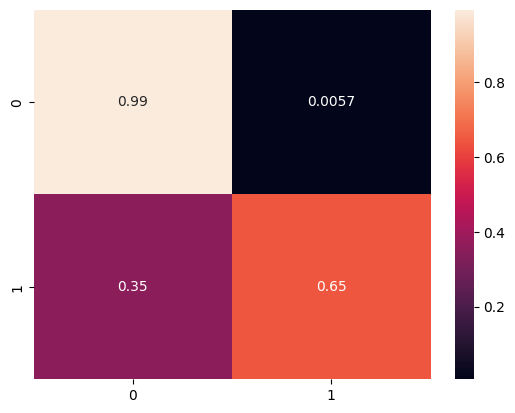

In [29]:
# y la matriz de confusion
sns.heatmap(confusion_matrix(y_test1, pred_rf , normalize='true'), annot=True)
# MUY DESBALANCEADO, Y POR ESO LA PREDICCION DEL NUMERO 1 ES MUCHO MAS MALA

In [30]:
# AHORA, CON ADABOOST, con su correspondiente validacion
from sklearn.ensemble import AdaBoostClassifier

model_ADA = AdaBoostClassifier(n_estimators=30, random_state=42)

results_cv_ab = cross_val_score(model_ADA, X_train1, y_train1, cv=10, scoring='recall')

In [31]:
print(results_cv_ab)
print(results_cv_ab.mean()) # EL RECALL ES INCLUSO PEOR QUE EL ANTERIOR,0,53

[0.49295775 0.49295775 0.63380282 0.47887324 0.66666667 0.45833333
 0.54929577 0.5915493  0.56338028 0.43661972]
0.536443661971831


In [32]:
# ENTRENAMOS EL MODELO Y PREDECIMOS PARA PODER CONSEGUIR EL CLASSIFICATION REPORT
model_ADA.fit(X_train1, y_train1)
pred_ADA = model_ADA.predict(X_test1)

In [33]:
# Y LA EVALUACION DE TODAS LAS METRICAS
print(classification_report(y_test1,pred_ADA))  
# LAS METRICAS DE LA CLASE 1, SIGUEN SIENDO MUY MALAS, BASTANTE PEOR QUE CON RANDOM FOREST, SOBRE TODO EL RECALL QUE ES LA MAS IMPORTANTE PARA ESTE CASO,
# (LOS AUTENTICOS POSITIVOS DE LA CLASE 1 SE CLASIFICAN MUCHO PEOR)

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1400
         1.0       0.86      0.55      0.67       200

    accuracy                           0.93      1600
   macro avg       0.90      0.77      0.82      1600
weighted avg       0.93      0.93      0.93      1600



<Axes: >

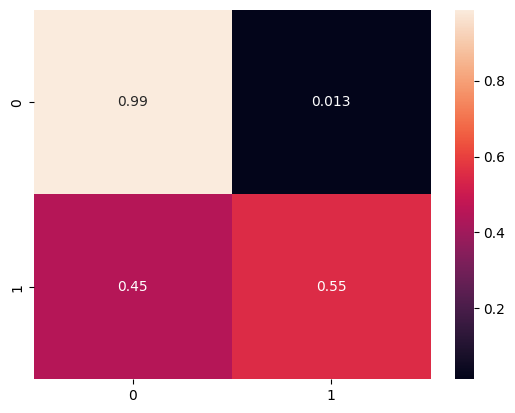

In [34]:
sns.heatmap(confusion_matrix(y_test1, pred_ADA , normalize='true'), annot=True)
# DE NUEVO, MALISIMA LA PREDICCION DE LA CLASE 1

In [35]:
# PASAMOS A GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
results_cv_gb = cross_val_score(model_gbc,X_train1, y_train1, cv=10, scoring='recall')

In [36]:
print(results_cv_gb)
print(results_cv_gb.mean()) # la media de recall mejora un poco 

[0.66197183 0.66197183 0.77464789 0.69014085 0.72222222 0.65277778
 0.70422535 0.69014085 0.67605634 0.78873239]
0.7022887323943662


In [37]:
# ENTRENAMOS EL MODELO Y PREDECIMOS PARA PODER CONSEGUIR EL CLASSIFICATION REPORT
model_gbc.fit(X_train1, y_train1)
pred_gbc = model_gbc.predict(X_test1)

In [38]:
#Y LA EVALUACION DE TODAS LAS METRICAS
print(classification_report(y_test1,pred_gbc)) # MEJORA EL RECALL AL CLASIFICAR LOS TRUE POSITIVES DE LA CLASE 1, 
#PERO SIGUE ESTANDO BASTANTE POR DEBAJO QUE LA CLASE 0

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1400
         1.0       0.94      0.72      0.81       200

    accuracy                           0.96      1600
   macro avg       0.95      0.86      0.90      1600
weighted avg       0.96      0.96      0.96      1600



<Axes: >

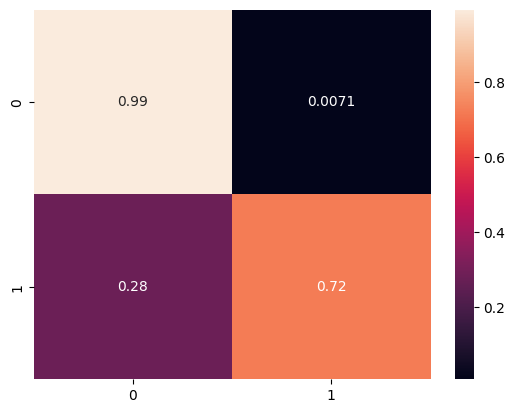

In [39]:
sns.heatmap(confusion_matrix(y_test1, pred_gbc , normalize='true'), annot=True)
# mejora con respecto a los otros modelos, aunque sigue siendo bastante peor que la prediccion de la otra clase

In [40]:
# AHORA PROBAREMOS XG BOOST
from xgboost import XGBRFClassifier

model_XGB = XGBRFClassifier(n_estimators=100, random_state=42, use_label_encoder=False)

results_cv_xgb = cross_val_score(model_XGB, X_train1, y_train1, cv=10, scoring='recall')


In [41]:
print(results_cv_xgb)
print(results_cv_xgb.mean()) # 0,76,el recall vuelve a mejorar con este modelo

[0.73239437 0.71830986 0.87323944 0.74647887 0.70833333 0.73611111
 0.74647887 0.78873239 0.78873239 0.8028169 ]
0.7641627543035995


In [42]:
# ENTRENAMOS EL MODELO Y PREDECIMOS PARA PODER CONSEGUIR EL CLASSIFICATION REPORT
model_XGB.fit(X_train1, y_train1)
pred_xgb = model_XGB.predict(X_test1)

In [43]:
#Y LA EVALUACION DE TODAS LAS METRICAS
print(classification_report(y_test1,pred_xgb)) # Y ESTE ES EL PRIMER MODELO QUE ARREGLA UN POCO EL DESBALANCEO DE LAS CLASES
# Y AUNQUE LA CLASIFICACION DE 1 ES ALGO PEOR, EMPIEZA A EQUIPARARSE (80, 85 DE RECALL Y F1-SCORE)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1400
         1.0       0.90      0.80      0.85       200

    accuracy                           0.96      1600
   macro avg       0.94      0.89      0.91      1600
weighted avg       0.96      0.96      0.96      1600



<Axes: >

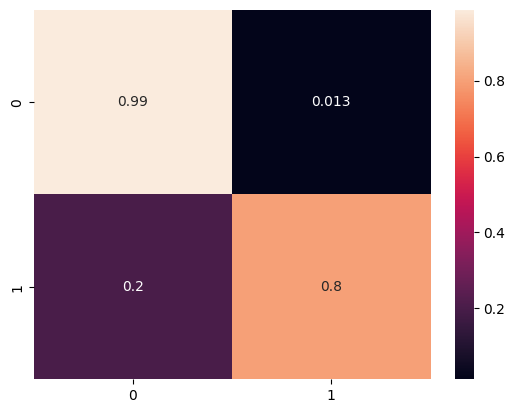

In [44]:
sns.heatmap(confusion_matrix(y_test1, pred_xgb , normalize='true'), annot=True)

In [45]:
# PARA VERLOS TODOS EN UNA TABLA (el recall, por ejemplo)
serie = [results_cv_rf.mean(),results_cv_ab.mean(),results_cv_gb.mean(),results_cv_xgb.mean()]
tabla_recall= pd.DataFrame(serie, columns = ['recall'], index = ["Random Forest", "Ada Boosting", "Gradient Boosting", "XGBoost"])

In [46]:
# buscamos este truco, PARA NO TENER QUE COPIAR DENTRO DE LA MEMORIA TODOS LOS MODELOS AQUI CREADOS, Y PODER ACCEDER A TABLA RECALL DIRECTAMENTE
# EN MI NOTEBOOK DEL RESUMEN
%store tabla_recall

Stored 'tabla_recall' (DataFrame)


In [47]:
# y ordenamos
tabla_recall.sort_values(by=['recall'], ascending=False)
# Tenemos que tener en cuenta que este recall es la media de LA CLASIFICACION DE LA CLASE 0 Y LA 1 TRAS EL CROSS VALIDATION, 
# Y LA DE LA CLASE 1 ES PEOR. AUNQUE EN OTRAS METRICAS LOS MODELOS SON MEJORES, el problema de la diferencia en clasificacion
# de las dos  clases habria que intentar arreglarlo.

,recall
XGBoost,0.764163
Gradient Boosting,0.702289
Random Forest,0.613850
Ada Boosting,0.536444


In [48]:
# SI QUEREMOS PROBAR ALGO PARA EQUIPARAR LA CLASES, DADO QUE ES MUY OBVIO QUE LA CLASIFICACION DE LA CLASE 1 
# ES PEOR QUE DE LA CERO A PESAR DE HABER ELEGIDO MODELOS CONTRA EL DESBALANCEO,
# PUES EL TARGET NO ESTA UN POCO, SI NO MUY DESBALANCEADO (88-11)

In [49]:
# PARA EVITAR VERNOS INFLUENCIADOS POR LA CLASE DOMINANTE 0(EN ESTE CASO, QUE EL AGUA SEA NO SEGURA) PROBAREMOS A RESAMPLEAR
!pip install imbalanced-learn # me descargo este modulo
from imblearn.over_sampling import SMOTE # oversampling, INTRODUCIMOS DATOS FICTICIOS DE LA CLASE MENOR
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [50]:
X_resampled

array([[ 0.77740287, -0.58549134, -0.48087476, ...,  1.05369443,
         1.33873624, -0.91704015],
       [ 1.30694501,  0.77511802, -0.59963176, ...,  1.05369443,
         0.85113427,  0.19802266],
       [ 0.27157158, -0.02908321, -0.48087476, ...,  0.70612871,
         2.03531047, -1.28872776],
       ...,
       [-0.19119862, -0.99547627, -0.63525886, ...,  0.70612871,
        -0.68132905, -1.28872776],
       [ 1.82122518, -0.5736653 , -0.5296376 , ..., -0.1248952 ,
         0.46548717, -0.54535255],
       [ 0.23520737, -1.03388714, -0.63363767, ..., -0.68778399,
         1.95614385, -0.5336432 ]])

In [51]:
y_resampled

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
14163    1.0
14164    1.0
14165    1.0
14166    1.0
14167    1.0
Name: is_safe, Length: 14168, dtype: float64

In [52]:
# y lo intentaremos asi, AUNQUE HAY QUE TENER CUIDADO Y REVISAR SI SE HAN INTRODUCIDO SESGOS EN LOS DATOS, AUNQUE ES DIFICIL DE SABER
# Y REVISAR MUY BIEN EL OVERFITTING
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [53]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (7996, 20)
Train features shape: (11334, 20)
Train target shape: (11334,)
Test features shape: (2834, 20)
Test target shape: (2834,)


In [54]:
# EMPEZAMOS POR REGRESION LOGISTICA
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) # CALCULAMOS LA PRECISION
print("Accuracy:", accuracy) 
# BUENO, NO ESTA MAL

Accuracy: 0.7992237120677488


In [55]:
model.classes_

array([0., 1.])

In [56]:
# Para ver todas las metricas
from sklearn.metrics import classification_report
metricas_regresion = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))
# NO ESTA MAL, Y PARECE QUE SE EQUILIBRAN LAS METRICAS EN AMBAS CLASES
%store metricas_regresion

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      1420
         1.0       0.80      0.79      0.80      1414

    accuracy                           0.80      2834
   macro avg       0.80      0.80      0.80      2834
weighted avg       0.80      0.80      0.80      2834

Stored 'metricas_regresion' (str)


In [57]:
# HACEMOS UN CROSS VALIDATIOM, pondremos el recall como metrica, PORQUE ME INTERESA LAS INSTANCIAS POSITIVAS SOBRE LAS REALES
# ESPECIALMENTE, AUNQUE LE ECHO UN VISTAZO A TODAS

results = cross_val_score(model, X_resampled, y_resampled, cv=10, scoring = 'recall')

results
%store results
# parece que hay algunos cortes que funcionan bastante mejor que otros.
# ALGUNOS ESTAN A 0,64 Y OTROS A 0,88, PUEDE SER QUE NO SEA EL MEJOR MODELO.

Stored 'results' (ndarray)


In [58]:
results

array([0.87447109, 0.64315938, 0.7842031 , 0.77856135, 0.79378531,
       0.78107345, 0.7980226 , 0.80932203, 0.75564972, 0.7980226 ])

In [59]:
print(results.mean())

0.7816270628640641


In [60]:
# vamos a comprobar con el train, para asegurar el overfitting, si empeora mucho con respecto al test, ES OVERFITTING
y_train_pred = model.predict(X_train)
print(classification_report(y_train,y_train_pred))
# NO EMPEORA MUCHO TAMPOCO, ES BASTANTE SIMILAR.

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80      5664
         1.0       0.80      0.78      0.79      5670

    accuracy                           0.79     11334
   macro avg       0.79      0.79      0.79     11334
weighted avg       0.79      0.79      0.79     11334



<Axes: >

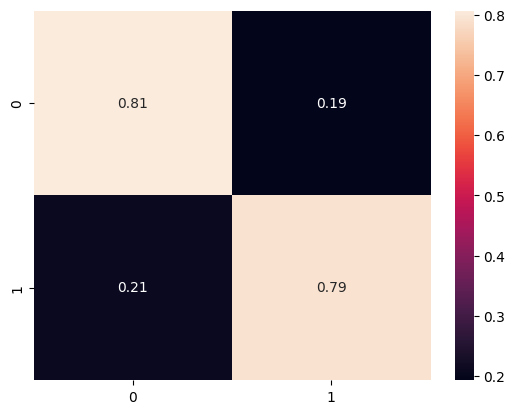

In [61]:
# y su matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)

In [62]:
# PROBAMOS SVC TAMBIEN
from sklearn.svm import SVC, LinearSVC
svc = LinearSVC(C=10, loss='hinge', max_iter=10000)
svc.fit(X_train,y_train)
pred_svm = svc.predict(X_test)

c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [63]:
# Y EL CROSS VALIDATION
val_SVC = cross_val_score(svc, X_resampled, y_resampled, cv=10, scoring = 'recall')

val_SVC
# HAY CORTES A 0,61 Y OTROS A 0,89 DE RECALL, BASTANTE VARIEDAD.

c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-package

array([0.88434415, 0.62059238, 0.77150917, 0.77715092, 0.78389831,
       0.77966102, 0.81073446, 0.81355932, 0.75706215, 0.79661017])

In [64]:
val_SVC.mean()

0.779512203867945

<Axes: >

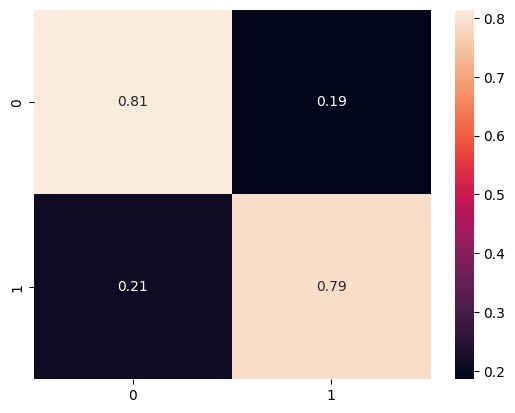

In [65]:
sns.heatmap(confusion_matrix(y_test, pred_svm , normalize='true'), annot=True)
# da mas o menos los mismos datos que la regresion logistica

In [66]:
metricas_svm = classification_report(y_test,pred_svm)
print(classification_report(y_test,pred_svm))
# no esta mal, pero no creo que sea el mejor modelo
%store metricas_svm

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      1420
         1.0       0.81      0.79      0.80      1414

    accuracy                           0.80      2834
   macro avg       0.80      0.80      0.80      2834
weighted avg       0.80      0.80      0.80      2834

Stored 'metricas_svm' (str)


In [67]:
# vamos a intentarlo con otro modelo, en este caso UN ARBOL DE DECISIONES
from sklearn.tree import DecisionTreeClassifier
model_arbol = DecisionTreeClassifier(max_depth=4, random_state=42)
model_arbol.fit(X_train,y_train)
pred_dt = model_arbol.predict(X_test)
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.9054340155257586


In [68]:
metricas_decission_tree = classification_report(y_test,pred_dt)
print(classification_report(y_test,pred_dt))
# EL MODELO NO ES MALO,DE HECHO EL RECALL ES EL MEJOR DE TODOS EN LA CLASIFICACION DE LA CLASE 1.
# pero vamos a hacer la validacion cruzada, para comprobar que no hay overfitting
%store metricas_decission_tree

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      1420
         1.0       0.88      0.94      0.91      1414

    accuracy                           0.91      2834
   macro avg       0.91      0.91      0.91      2834
weighted avg       0.91      0.91      0.91      2834

Stored 'metricas_decission_tree' (str)


In [69]:
#y hacemos el cross validation
val_arbol = cross_val_score(model_arbol, X_resampled, y_resampled, cv=10, scoring = 'recall')
val_arbol
# empeora especialmente, en cada corte, hay algunos que estan en 59 y otros en 94
%store val_arbol

Stored 'val_arbol' (ndarray)


In [70]:
print(val_arbol.mean())

0.8939914975337271


In [71]:
# y vamos a comprobar con el train, para asegurar el overfitting, si empeora mucho con respecto al test, ES OVERFITTING
y_train_pred1 = model_arbol.predict(X_train)
print(classification_report(y_train,y_train_pred1))
# NO EMPEORA MUCHO TAMPOCO, SOLO UN POCO, IGUAL EL CORTE EN CROSS DE UN 59 ES POR OTRO MOTIVO EN LOS DATOS.

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      5664
         1.0       0.88      0.94      0.91      5670

    accuracy                           0.91     11334
   macro avg       0.91      0.91      0.91     11334
weighted avg       0.91      0.91      0.91     11334



In [72]:
# PARA VER A CUAL DE LAS COLUMNAS SE LE DA MAS IMPORTANCIA EN ESTE MODELO
model_arbol.feature_importances_ 

array([0.46764272, 0.01373165, 0.        , 0.        , 0.15048352,
       0.00508785, 0.        , 0.        , 0.        , 0.        ,
       0.0383391 , 0.        , 0.04898833, 0.0584818 , 0.        ,
       0.06002807, 0.        , 0.        , 0.11460787, 0.0426091 ])

In [73]:
columnas_importancia = model_arbol.feature_importances_
importancia_ordenada= np.sort(columnas_importancia,axis=-1)[::-1]
importancia_ordenada
# podemos ver que nuestro modelo de arbol, SOLO LE DA PRIORIDAD A LA MITAD DE LAS VARIABLES, EL RESTO NI LAS TIENE EN CONSIDERACION, LES DA UN VALOR DE CERO IMPORTANCIA.
# NOS GUARDAMOS ESTA INFORMACION, PUES ES POSIBLE QUE ELIMINANDO VARIABLES OBTENGAMOS MEJORES DATOS.

array([0.46764272, 0.15048352, 0.11460787, 0.06002807, 0.0584818 ,
       0.04898833, 0.0426091 , 0.0383391 , 0.01373165, 0.00508785,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

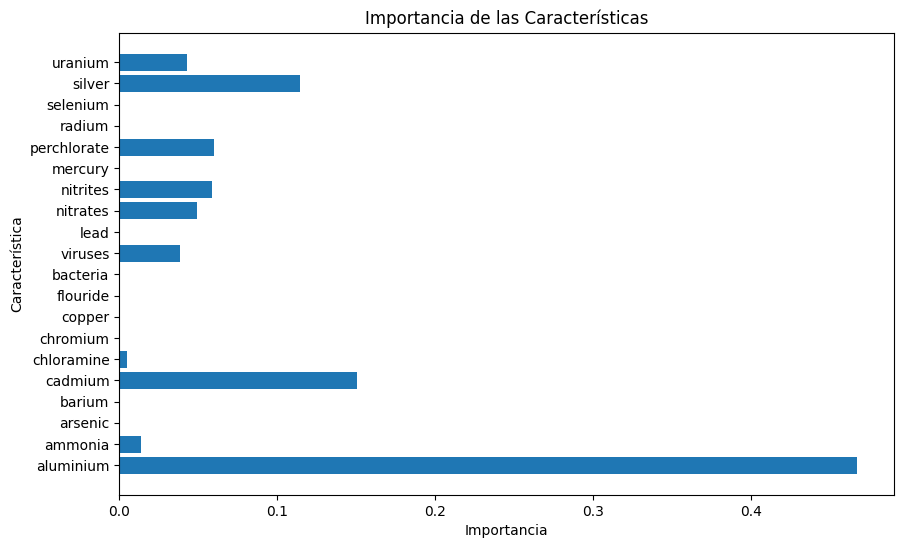

In [74]:
# y representamos la importancia en un grafico
X_importancia = calidad1.drop(['is_safe'],axis=1)
importancias = model_arbol.feature_importances_
nombres_caracteristicas = X_importancia.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(nombres_caracteristicas)), importancias, align='center')
plt.yticks(range(len(nombres_caracteristicas)), nombres_caracteristicas)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()
# Y ASI VISUALIZAMOS LA IMPORTANCIA QUE SE LE DA A CADA UNA DE LAS COLUMNAS en este modelo de arbol, Y A LA QUE MAS IMPORTANCIA LE DA ES AL ALUMINIO,
# AL CADMIO Y A LA PLATA. Tambien vemos que hay algunos, como el selenio, radio o el bario, al que este modelo no
# les da casi ninguna importancia

<Axes: >

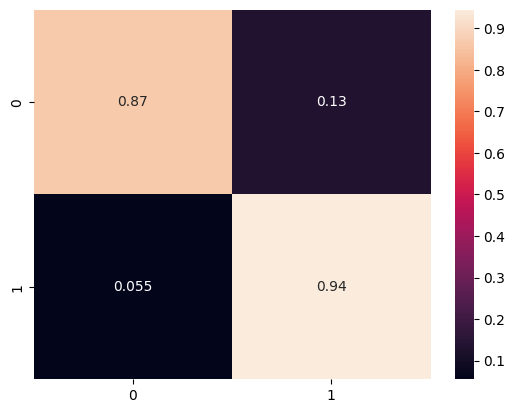

In [75]:
# y la matriz de confusion
sns.heatmap(confusion_matrix(y_test, pred_dt , normalize='true'), annot=True)

In [76]:
# TODOS LOS MODELOS, TANTO REGRESION LINEAL,SVC, COMO DECISSION TREE SON BASTANTE BUENOS tras el resampleo,
# AUNQUE TIENEN BASTANTE VARIEDAD EN EL RECALL DE LOS CORTES DEL CROSS VALIDATION, 
# PERO PODEMOS VER SI PROBANDO ENSEMBLES (como los anteriores) RESAMPLEADOS CONSEGUIMOS MEJORES DATOS, siempre vigilando el overfitting

In [77]:
# Empezamos con un random forest
from sklearn.ensemble import RandomForestClassifier
model_rf_resampleado = RandomForestClassifier(n_estimators=100,max_features=3, random_state=42)
model_rf_resampleado.fit(X_train, y_train)
pred_rf_resampleado = model_rf_resampleado.predict(X_test)

In [78]:
# Hacemos una validacion cruzada, para ver si los datos tienen sentido
from sklearn.model_selection import cross_val_score
model_rf_val_res = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)
results_cv_rf_res = cross_val_score(model_rf_val_res, X_train, y_train, cv=10, scoring='recall')

In [79]:
print(results_cv_rf_res)
print(results_cv_rf_res.mean())
# en principio, todos los cortes tienen mas o menos lo mismo, pero la media es muy mala

[0.98412698 0.98412698 0.98412698 0.98941799 0.97530864 0.97178131
 0.98412698 0.98236332 0.98765432 0.98412698]
0.982716049382716


In [80]:
# USO CLASIFICACION REPORT, PARA VER todas las metricas
print(classification_report(y_test,pred_rf_resampleado))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1420
         1.0       0.97      0.99      0.98      1414

    accuracy                           0.98      2834
   macro avg       0.98      0.98      0.98      2834
weighted avg       0.98      0.98      0.98      2834



<Axes: >

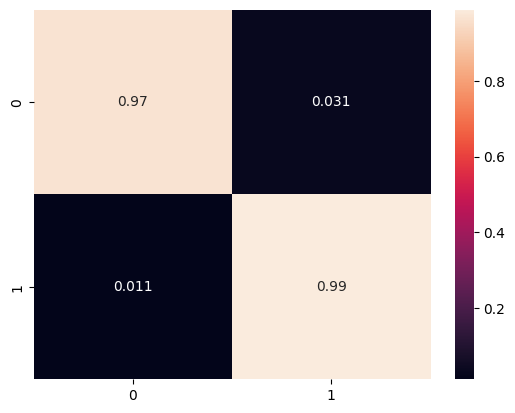

In [81]:
# y la matriz de confusion
sns.heatmap(confusion_matrix(y_test, pred_rf_resampleado, normalize='true'), annot=True)

In [82]:
# tambien podemos sacar la importancia de las features
model_rf_resampleado.feature_importances_ 

array([0.18287895, 0.0229079 , 0.07925353, 0.02326999, 0.09901419,
       0.06485435, 0.05451257, 0.03019472, 0.01386511, 0.02806753,
       0.0493066 , 0.0249638 , 0.03423133, 0.04290091, 0.01456401,
       0.075667  , 0.02882173, 0.0186125 , 0.06552629, 0.04658699])

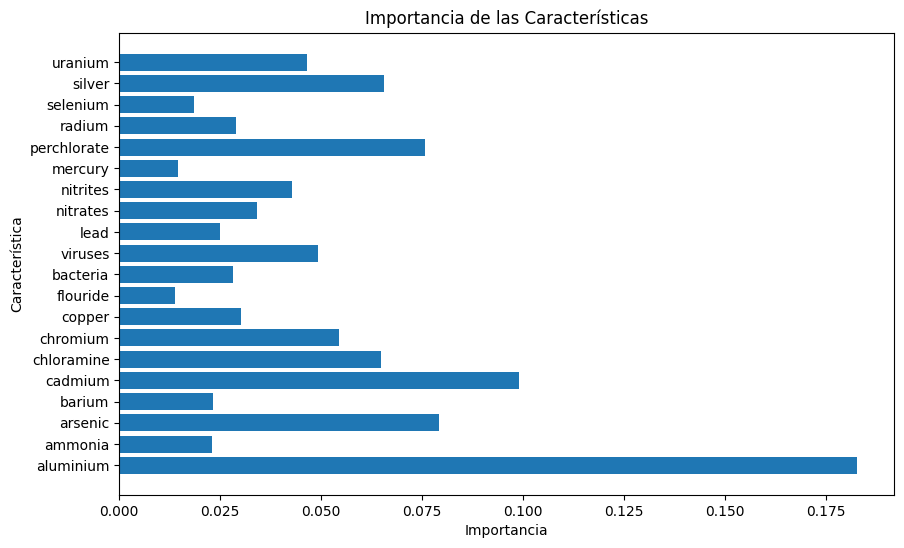

In [83]:
# y representamos la importancia en un grafico
X_importancia = calidad1.drop(['is_safe'],axis=1)
importancias = model_rf_resampleado.feature_importances_
nombres_caracteristicas = X_importancia.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(nombres_caracteristicas)), importancias, align='center')
plt.yticks(range(len(nombres_caracteristicas)), nombres_caracteristicas)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()
# en este modelo, la importancia esta mas repartida entre todas las variables que en el modelo decission tree.

In [84]:
# ahora con adaboost
model_ADA_resampleado = AdaBoostClassifier(n_estimators=30, random_state=42)

results_cv_ab_resampleado = cross_val_score(model_ADA_resampleado, X_train, y_train, cv=10, scoring='recall')

In [85]:
print(results_cv_ab_resampleado)
print(results_cv_ab_resampleado.mean()) 

[0.90299824 0.87654321 0.87830688 0.86243386 0.88536155 0.88007055
 0.88536155 0.91534392 0.87654321 0.86948854]
0.8832451499118166


In [86]:
# ENTRENAMOS EL MODELO Y PREDECIMOS PARA PODER CONSEGUIR EL CLASSIFICATION REPORT
model_ADA_resampleado.fit(X_train, y_train)
pred_ADA_res = model_ADA_resampleado.predict(X_test)

In [87]:
# Y LA EVALUACION DE TODAS LAS METRICAS
print(classification_report(y_test,pred_ADA_res))  

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      1420
         1.0       0.90      0.90      0.90      1414

    accuracy                           0.90      2834
   macro avg       0.90      0.90      0.90      2834
weighted avg       0.90      0.90      0.90      2834



<Axes: >

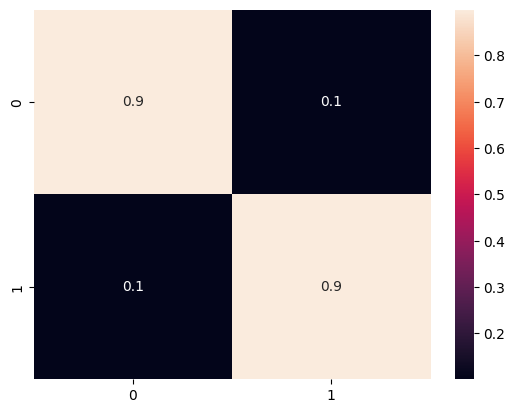

In [88]:
sns.heatmap(confusion_matrix(y_test, pred_ADA_res, normalize='true'), annot=True)

In [89]:
model_ADA_resampleado.feature_importances_ 

array([0.1       , 0.03333333, 0.1       , 0.        , 0.13333333,
       0.06666667, 0.        , 0.03333333, 0.        , 0.        ,
       0.1       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.06666667, 0.03333333, 0.03333333, 0.06666667, 0.1       ])

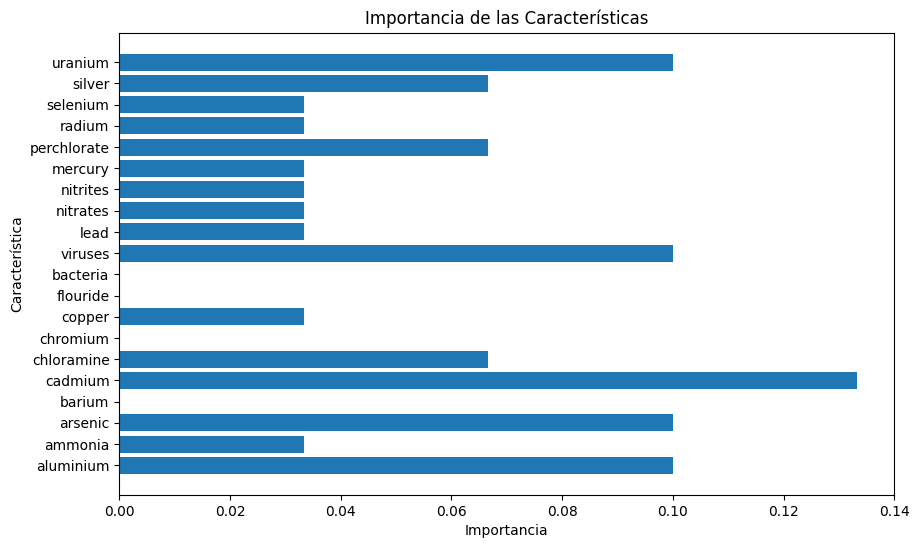

In [90]:
# y representamos la importancia en un grafico
X_importancia = calidad1.drop(['is_safe'],axis=1)
importancias = model_ADA_resampleado.feature_importances_
nombres_caracteristicas = X_importancia.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(nombres_caracteristicas)), importancias, align='center')
plt.yticks(range(len(nombres_caracteristicas)), nombres_caracteristicas)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()
# aunque el porcentaje de importancia es algo distinto, se siguen manteniendo en los primeros puestos de importancia
# el aluminio y el cadmio, EL PERCLORATO Y EL URANIUM SE DISPARAN CON RESPECTO A LOS OTROS ANALISIS.
# EN ESTE MODELO, NO TODAS LAS FEATURES TIENEN IMPORTANCIA COMO EN RANDOM FOREST. ALGUNAS COMO EL MERCURIO, BACTERIAS O CROMO
# NO SON NADA REPRESENTATIVAS

In [91]:
# PASAMOS A GRADIENT BOOSTING
model_gbc_resampleado = GradientBoostingClassifier(n_estimators=100, random_state=42)
results_cv_gb_resampleado = cross_val_score(model_gbc_resampleado,X_train, y_train, cv=10, scoring='recall')

In [92]:
print(results_cv_gb_resampleado)
print(results_cv_gb_resampleado.mean()) 

[0.98589065 0.97883598 0.97530864 0.97001764 0.97354497 0.96296296
 0.97530864 0.9664903  0.96825397 0.96825397]
0.9724867724867725


In [93]:
# ENTRENAMOS EL MODELO Y PREDECIMOS PARA PODER CONSEGUIR EL CLASSIFICATION REPORT
model_gbc_resampleado.fit(X_train, y_train)
pred_gbc_res = model_gbc_resampleado.predict(X_test)

In [94]:
#Y LA EVALUACION DE TODAS LAS METRICAS
print(classification_report(y_test,pred_gbc_res)) # MEJORA EL RECALL AL CLASIFICAR LOS TRUE POSITIVES DE LA CLASE 1, 
#PERO SIGUE ESTANDO BASTANTE POR DEBAJO QUE LA CLASE 0

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1420
         1.0       0.95      0.98      0.96      1414

    accuracy                           0.96      2834
   macro avg       0.96      0.96      0.96      2834
weighted avg       0.96      0.96      0.96      2834



<Axes: >

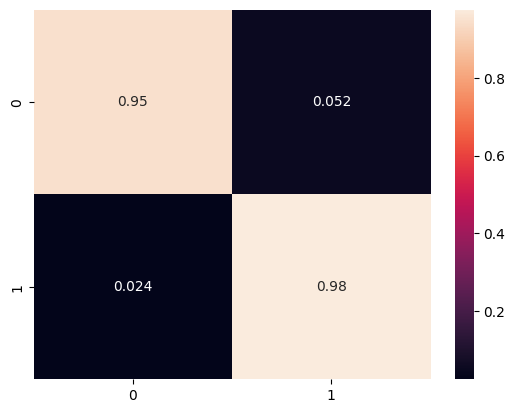

In [95]:
sns.heatmap(confusion_matrix(y_test, pred_gbc_res, normalize='true'), annot=True)

In [96]:
model_gbc_resampleado.feature_importances_ 

array([0.41280937, 0.0059829 , 0.02621607, 0.00097931, 0.13445383,
       0.03518159, 0.00247932, 0.00904248, 0.00056762, 0.01399541,
       0.04155535, 0.00279098, 0.02043907, 0.05939038, 0.00370784,
       0.06679929, 0.00616733, 0.00562846, 0.08963401, 0.0621794 ])

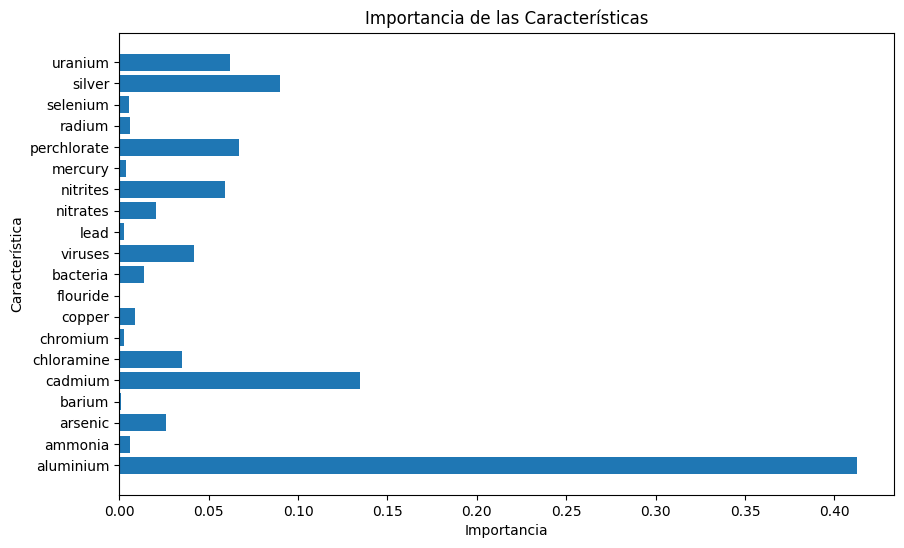

In [97]:
# y representamos la importancia en un grafico
X_importancia = calidad1.drop(['is_safe'],axis=1)
importancias = model_gbc_resampleado.feature_importances_
nombres_caracteristicas = X_importancia.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(nombres_caracteristicas)), importancias, align='center')
plt.yticks(range(len(nombres_caracteristicas)), nombres_caracteristicas)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()
# DE NUEVO, EN GRADIENT BOOSTING SE LE APLICA MAYOR IMPORTANCIA A ALUMINIO CADMIO Y PLATA, CASI COMO EN EL MODELO DECISSION TREE
# teniendo elementos como el fluoruro y el bario importancia practicamente nula.

In [98]:
# Y POR ULTIMO, XGBOOST
model_XGB_resampleado = XGBRFClassifier(n_estimators=100, random_state=42, use_label_encoder=False)
results_cv_xgb_resampleado = cross_val_score(model_XGB_resampleado, X_train, y_train, cv=10, scoring='recall')

In [99]:
print(results_cv_xgb_resampleado)
print(results_cv_xgb_resampleado.mean()) 

[0.97354497 0.96825397 0.97530864 0.97001764 0.97883598 0.96472663
 0.98059965 0.97883598 0.97530864 0.98059965]
0.9746031746031745


In [100]:
# ENTRENAMOS EL MODELO Y PREDECIMOS PARA PODER CONSEGUIR EL CLASSIFICATION REPORT
model_XGB_resampleado.fit(X_train, y_train)
pred_xgb_resampleado = model_XGB_resampleado.predict(X_test)

In [101]:
#Y LA EVALUACION DE TODAS LAS METRICAS
print(classification_report(y_test,pred_xgb_resampleado))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      1420
         1.0       0.94      0.98      0.96      1414

    accuracy                           0.96      2834
   macro avg       0.96      0.96      0.96      2834
weighted avg       0.96      0.96      0.96      2834



<Axes: >

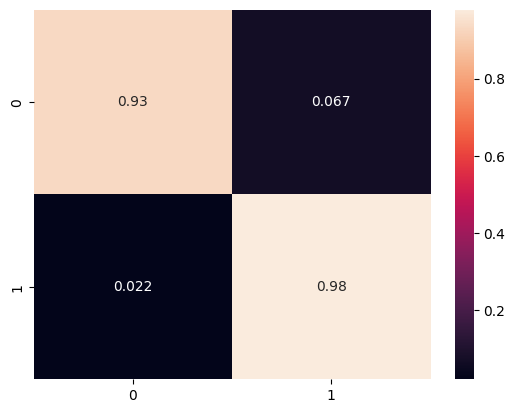

In [102]:
sns.heatmap(confusion_matrix(y_test, pred_xgb_resampleado, normalize='true'), annot=True)

In [103]:
model_XGB_resampleado.feature_importances_ 

array([0.29177377, 0.0214411 , 0.01887589, 0.00486695, 0.14226751,
       0.03568818, 0.00638223, 0.01086782, 0.00218913, 0.03405648,
       0.0630413 , 0.03337853, 0.05325757, 0.06368476, 0.01099721,
       0.0426549 , 0.02173097, 0.01157125, 0.07465299, 0.05662145],
      dtype=float32)

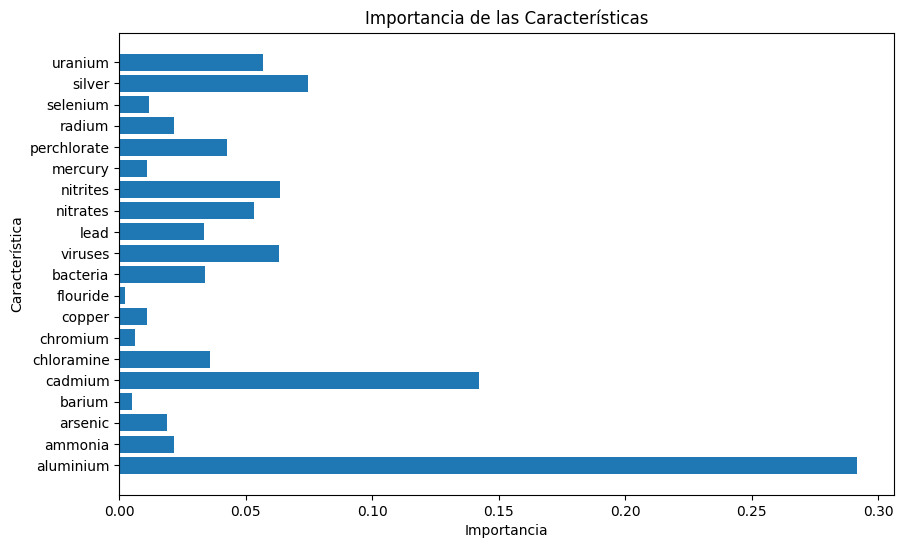

In [104]:
# y representamos la importancia en un grafico
X_importancia = calidad1.drop(['is_safe'],axis=1)
importancias = model_XGB_resampleado.feature_importances_
nombres_caracteristicas = X_importancia.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(nombres_caracteristicas)), importancias, align='center')
plt.yticks(range(len(nombres_caracteristicas)), nombres_caracteristicas)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()
# NADA SORPRENDENTE, EN LOS PRIMEROS PUESTOS SE MANTIENEN LAS 3 MAS ALTAS DE LOS MODELOS DE ARBOLES COMO RANDOM FOREST Y DECISSION TREE,
# ALUMINIO,PLATA Y CADMIO, PERO COMO EN RF SE LE DA IMPORTANCIA A TODAS LAS VARIABLES, NO COMO EN DECISSION TREE O ADABOOST.

In [105]:
# PARA VERLOS TODOS EN UNA TABLA (el recall, por ejemplo) de los 4 modelos usados
serie = [results.mean(), val_SVC.mean(),val_arbol.mean(),results_cv_rf_res.mean(),results_cv_ab_resampleado.mean(),results_cv_gb_resampleado.mean(),results_cv_xgb_resampleado.mean()]
tabla_recall_resampleado= pd.DataFrame(serie, columns = ['recall'], index = ["Regresion logistica","SVC","DecissionTree Classifier","Random Forest", "Ada Boosting", "Gradient Boosting", "XGBoost"])

In [106]:
# PARA USARLO EN EL NOTEBOOK DE MEMORIA
%store tabla_recall_resampleado

Stored 'tabla_recall_resampleado' (DataFrame)


In [107]:
# y ordenamos
tabla_recall_resampleado.sort_values(by=['recall'], ascending=False)
# EL RECALL HA AUMENTADO HASTA CASI LOGRAR LA PERFECCION, SOBRE TODO EN EL CASO DE RANDOM FOREST, INCLUSO SIN HIPERPAAMETRIZAR!!
# SVC Y REGRESION LOGISTICA ES EL QUE FUNCIONA PEOR EN ESTE CASO, DE MODO QUE PODEMOS INTENTAR HIPERPARAMETRIZAR SOLO RANDOM FOREST Y XGBOOST,
# LOS DOS MEJORES A NIVEL DE DATOS PARA VER SI LOGRAMOS INCLUSO MEJORAR SU YA ALTISIMA PRECISION.


,recall
Random Forest,0.982716
XGBoost,0.974603
Gradient Boosting,0.972487
DecissionTree Classifier,0.893991
Ada Boosting,0.883245
Regresion logistica,0.781627
SVC,0.779512


In [108]:
# Lo que nos queda, HIPERPARAMETRIZAR (ENCONTRAR PARAMETROS OPTIMOS PARA LOS MEJORES MODELOS,
# EN ESTE CASO, RANDOM FOREST Y XGBOOST), elegir con un gridsearch y especificar los pasos QUE HEMOS SEGUIDO
# EMPEZAMOS CON RANDOM FOREST
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [50,100,],
              'max_features': [2,3,4,5],
              'max_depth': [2,3,4,5]
            }

modelo_RF = RandomForestClassifier(random_state=42)

rf_gs = GridSearchCV(modelo_RF, parameters, cv=3, scoring='recall')

rf_gs.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [50, 100]},
             scoring='recall')

In [109]:
print(rf_gs.best_estimator_)
print(rf_gs.best_score_)
print(rf_gs.best_params_) # el best score, para evitar el overfitting y con una buena robustez,0,95 aunque en el cross value
# tenia 0,98, mayor aun sin parametrizar. Puede ser que hallamos usado demasiados parametros, o que no fueran los adecuados
# o que la validacion cruzada 3 sea insuficiente'''

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=50,
                       random_state=42)
0.9506172839506172
{'max_depth': 5, 'max_features': 5, 'n_estimators': 50}


In [110]:
# y un resumen de sus metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
y_pred_rf= rf_gs.best_estimator_.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred_rf))
print('Precision', precision_score(y_test, y_pred_rf))
print('Recall', recall_score(y_test, y_pred_rf))
print('ROC', roc_auc_score(y_test, y_pred_rf))


Accuracy 0.9431898376852506
Precision 0.9207521826729349
Recall 0.9695898161244696
ROC 0.9432456122875869


<Axes: >

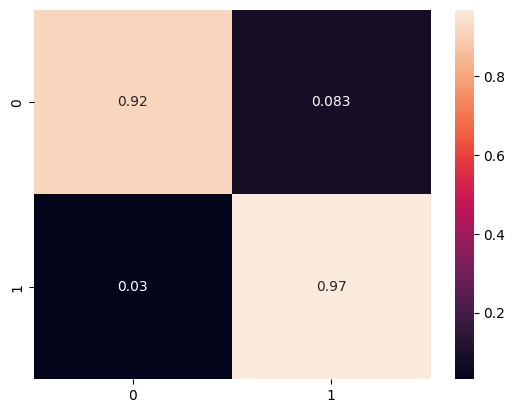

In [111]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf, normalize='true'), annot=True)

In [112]:
# Hemos visto que tras usar grid search empeoran incluso las metricas, puede ser porque he elegido demasiados 
# parametros, por las muestras...

In [113]:
# y ahora con XGBOOST
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [25, 50,75],
              'max_depth': [3,4,5],
              'learning_rate': [0.1,0.5,0.7]
            }


modelo_xgboost = XGBRFClassifier(random_state=42)

xgb_gs = GridSearchCV(modelo_xgboost, parameters, cv=3, scoring='recall')

xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=42, reg_alpha=None, ...),
             param_grid={'learning_rate': [0.1, 0.5, 0.7],
                         'max_depth': [3, 4, 5], 'n_estimators': [25, 50, 75]},
             scoring='recall')

In [114]:
print(xgb_gs.best_estimator_)
print(xgb_gs.best_score_)
print(xgb_gs.best_params_)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=75, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, ...)
0.9666666666666668
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75}


In [115]:
y_pred_xgb = xgb_gs.best_estimator_.predict(X_test)

# y su resumen de metricas
print('Accuracy', accuracy_score(y_test, y_pred_xgb))
print('Precision', precision_score(y_test, y_pred_xgb))
print('Recall', recall_score(y_test, y_pred_xgb))
print('ROC', roc_auc_score(y_test, y_pred_xgb))

Accuracy 0.9386026817219478
Precision 0.91005291005291
Recall 0.9731258840169731
ROC 0.9386756180648246


In [116]:
# Tampoco han mejorado, incluso ha empeorado ligeramente.

<Axes: >

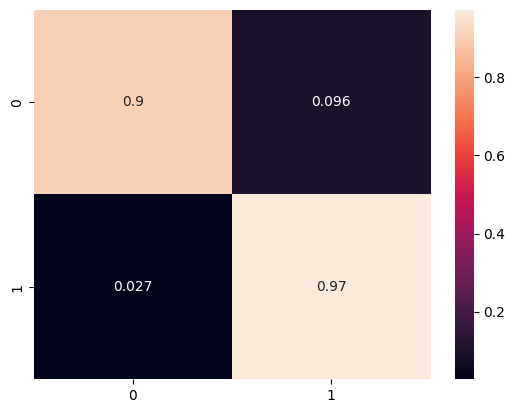

In [117]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True)

In [118]:
# para guardar los modelos
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_rf_val_res, file)

with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model_XGB_resampleado, file)
